ベイズ最適化入門  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2. A few modifications to fit it to python3 are needed.

In [1]:
%matplotlib inline
%run ../common/homemade_GPR.py
%run ../common/homemade_BO.py
import sys
import matplotlib.pyplot as plt
np.random.seed(seed=123)

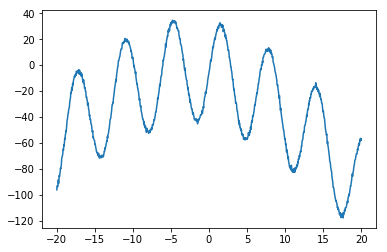

In [2]:
#Define data, supervised data
def target_func(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
z = list(map(target_func,x)) #for python3
z = np.array(z)
plt.plot(x, z) #### plot true data
plt.show()
def generate_sample(xval):
    xid = np.argmin((x - xval)**2)
    return z[xid]

In [3]:
#Define GPR and Bayesian opt.
GPR = Gaussian_Process_Regression()
#GPR.a1_RBF = 0.0
typical_scale=0.1
GPR.a1_RBF = 1.0
GPR.a2_RBF = typical_scale**2
GPR.a1_exp = 0.0
GPR.a2_exp = typical_scale
GPR.a1_const = 0.0
print(GPR.a1_RBF, GPR.a2_RBF, GPR.a1_exp, GPR.a2_exp, GPR.a1_const)
#print('# The choice of the kernel: ', GPR.kernel_name1)
#
BO = Bayesian_opt()
#BO.acqui_name = 'EI'
BO.acqui_name = 'PI'
#BO.acqui_name = 'UCB'
print('# The choice of acquisition function: ',BO.acqui_name)

1.0 0.010000000000000002 0.0 0.1 0.0
# The choice of acquisition function:  PI


epoch =  0 , x_point, maxval = -12.781861371329658,  -35.111729295690374
epoch =  1 , x_point, maxval = -12.592592592592592,  -29.12257622597689
epoch =  2 , x_point, maxval = -12.552552552552552,  -25.37248296886311
epoch =  3 , x_point, maxval = -20.0,  -25.37248296886311
epoch =  4 , x_point, maxval = -19.5995995995996,  -25.37248296886311
epoch =  5 , x_point, maxval = -19.03903903903904,  -25.37248296886311
epoch =  6 , x_point, maxval = -18.55855855855856,  -25.37248296886311
epoch =  7 , x_point, maxval = -18.27827827827828,  -25.37248296886311
epoch =  8 , x_point, maxval = -18.1981981981982,  -25.06140399179454
No new sampling point in this sequence.
No new sampling point in this sequence.
No new sampling point in this sequence.
No new sampling point in this sequence.
No new sampling point in this sequence.
No new sampling point in this sequence.
No new sampling point in this sequence.


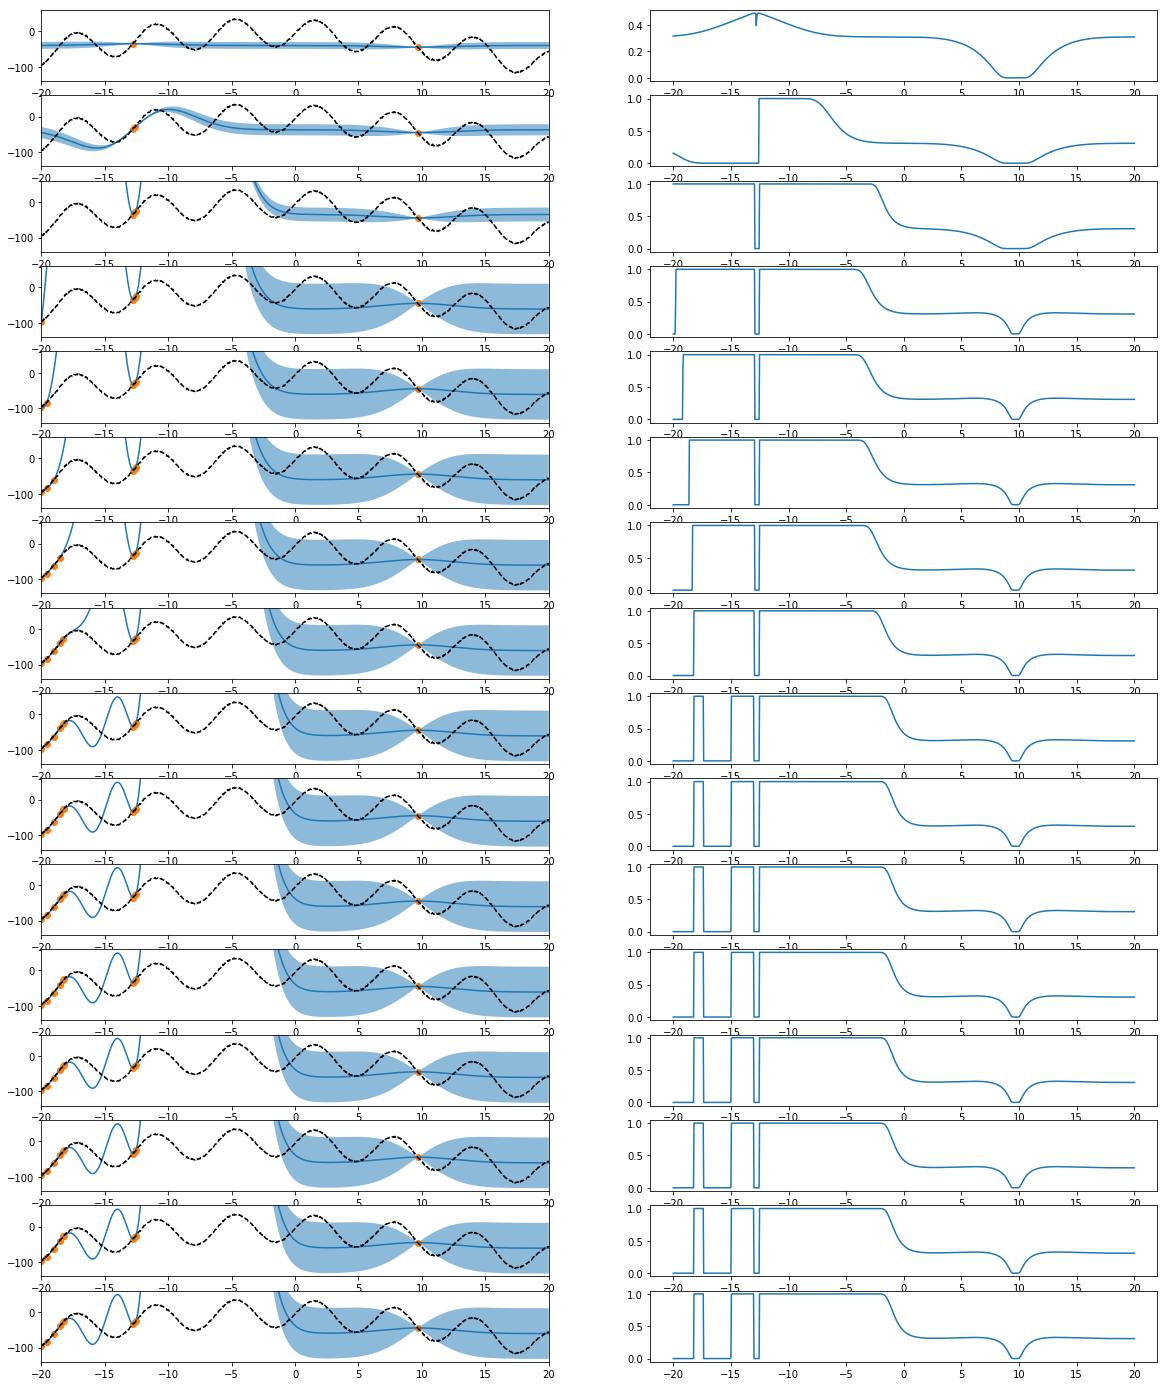

# Actual value of maximum is [34.6804609]
# Got value in the Bayesian_opt is -25.06140399179454
# Optimization is finished.


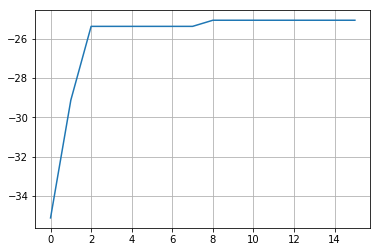

In [4]:
#Definition of array
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(-20,20) #Initial point is randomely chosen
x_sample = np.append(x_sample,x_point) 
y_point = generate_sample(x_point) 
y_sample = np.append(y_sample,y_point) 
x_point = np.random.uniform(-20,20) #Second point is randomely chosen as well
#
maxval_list = []
#
epoch = 16 #Number of optimization
Nplotevery = 1
maxval = 'Initial'
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_sample:
        x_sample = np.append(x_sample,x_point)                          #Add x_point to x_sample
        y_point = generate_sample(x_point)                              #Get y_point value from x_sample
        y_sample = np.append(y_sample,y_point)                          #Add y_point to x_ample
        print ("epoch = ",str(i),", x_point, maxval = "+str(x_point)+',  '+str(max(y_sample)))
    else: 
        print('No new sampling point in this sequence.')
    mean, std = GPR.xsample2meanvariance(x_sample, y_sample, x, eps = 1.0e-10) #Get mean/std
    maxval = max(y_sample)                                                     #Update maximum value up to now
    acqui = BO.get_acqui(mean, std, maxval)                                      #Define acquisition function
    x_point = x[np.argmax(acqui)]                                               #Determin the next candidate of the search
    maxval_list.append(maxval)
    if(i%Nplotevery==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x,np.array(mean))
        plt.plot(x,z,'k--')
        high_bound = mean+ 1.0*std
        lower_bound = mean- 1.0*std
        plt.fill_between(x,high_bound,lower_bound, alpha=0.5)
        plt.xlim(-20,20)
        plt.ylim(-140,60)
        plt.scatter(x_sample,y_sample)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x,acqui)
        plt.savefig("bayes_"+str(BO.acqui_name)+".png")
plt.show()

print("# Actual value of maximum is "+str(max(z)))
print("# Got value in the Bayesian_opt is "+str(maxval))
print("# Optimization is finished.")
plt.figure()
plt.plot(maxval_list)
plt.grid()
plt.show()